# Edge Detection
### Using gradients

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.ndimage import convolve
from math import pi, sin, cos, tan

In [3]:
dir_path = "C:/Users/gerag/Desktop/Coursera/Fisrt Principles of Computer Vision/Features and Boundaries/Edge Detection/"
im_name = "rubiks.png"

In [4]:
def plot_img(img):
    plt.imshow(img,cmap='gray')
    plt.grid(False)
    plt.axis('off')
    plt.rcParams["figure.autolayout"] = True
    plt.show()

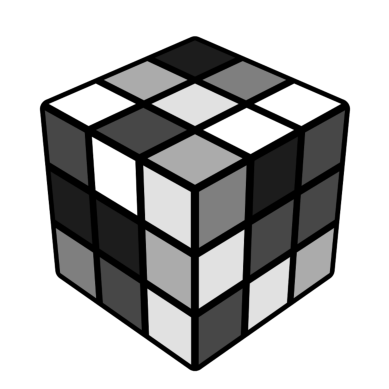

In [5]:
img_color = cv2.imread(dir_path+im_name) #Read image in grey scale
img_color = cv2.resize(img_color, (800,800), interpolation = cv2.INTER_CUBIC)
img = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plot_img(img)

### Discrete Gradient ($\nabla$) Operator

##### Finite difference approximations:
<img src="eq_1.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" />


$$ \frac{\partial I}{\partial x} \approx \frac{1}{2\epsilon} \left[ \left(I_{i+1,j+1}-I_{i,j+1} \right) + \left(I_{i+1,j}-I_{i,j} \right)\right]$$

$$ \frac{\partial I}{\partial y} \approx \frac{1}{2\epsilon} \left[ \left(I_{i+1,j+1}-I_{i+1,j} \right) + \left(I_{i,j+1}-I_{i,j} \right)\right]$$


##### Implementation using convolutions

$$\frac{\partial}{\partial x} \approx \frac{1}{2 \epsilon} \begin{bmatrix} -1 & 1\\ -1 & 1 \end{bmatrix} \hspace{3cm} \frac{\partial}{\partial y} \approx  \frac{1}{2 \epsilon} \begin{bmatrix} 1 & 1\\ -1 & -1 \end{bmatrix} $$


In [6]:
roberts_x = np.array([[0,1],[-1,0]])
roberts_y = np.array([[0,1],[-1,0]])

prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

sobel_3x3_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_3x3_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [7]:
epsilon = 1

x_kernel = 1/(2*epsilon) * sobel_3x3_x
y_kernel = 1/(2*epsilon) * sobel_3x3_y

x_part_der = convolve(img,x_kernel)
y_part_der = convolve(img,y_kernel)

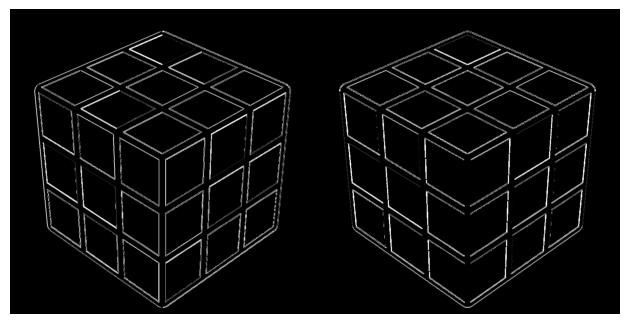

In [8]:
plot_img(np.concatenate((x_part_der, y_part_der), axis=1))

#### Gradient ($\nabla$) as edge detection

$\nabla$ Magnitude: $\hspace{3cm} S = ||\nabla I|| = \sqrt{\left(\frac{\partial I}{\partial x} \right)^2 + \left(\frac{\partial I}{\partial y} \right)^2} $


$\nabla$ Orientation: $\hspace{3cm} \theta = \tan^{-1} \left( \frac{ \frac{\partial I}{\partial y}  }{\frac{\partial I}{\partial x}} \right)$


In [9]:
Magnitude = np.sqrt( x_part_der**2 + y_part_der**2  )
Magnitude = Magnitude/np.max(Magnitude) * 255

Orientation = np.arctan2(y_part_der,x_part_der)

##### Edge Thresholding

In [10]:
moves = [[-1, 0],
         [-1, 1],
         [0, 1],
         [1, 1],
         [1, 0],
         [1, -1],
         [0, -1],
         [-1, -1]]

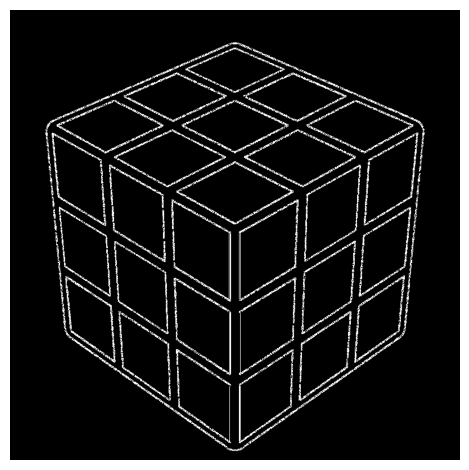

In [17]:
T0 = 100
T1 = 150

f,c = Magnitude.shape

threshold = np.zeros_like(img)

for i in range(f):
    for j in range(c):

        if Magnitude[i][j] < T0:
            threshold[i][j] = 0
        elif Magnitude[i][j] >= T1:
            threshold[i][j] = 255
        else: #T0<= Magnitude[i][j] < T1
            for move in moves:
                if i+move[0] < f and j+move[1] < c and i+move[0] > 0 and j+move[1] > 0:
                    if T0 <= Magnitude[i+move[0]][j+move[1]] < T1:
                        threshold[i][j] = 255
plot_img(threshold)

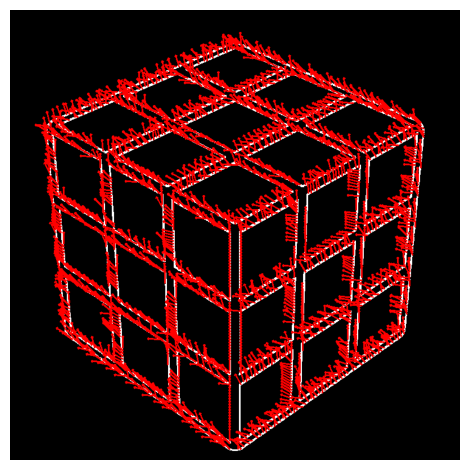

In [12]:
d = 20

thresh = cv2.cvtColor(threshold,cv2.COLOR_GRAY2BGR)

for i in range(0,c,5):
    for j in range(0,f,5):
        if threshold[i][j] == 255:
            x2 = int(j - d*sin(Orientation[i][j]))
            y2 = int(i - d*cos(Orientation[i][j]))
            thresh = cv2.arrowedLine(thresh, (j,i),(x2,y2),(0,0,255),2)


plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.axis('off')
plt.rcParams["figure.autolayout"] = True
plt.show()